In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from scipy.stats import ttest_ind

In [3]:
# Load Dataset
df = pd.read_csv('../data/raw/diabetes_012_health_indicators_BRFSS2023.csv')

In [15]:
df.describe()

,Diabetes_012,KidneyDisease,HighBP,HighChol,CholCheck,Asthma,COPD,BMI,Smoker,Stroke,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,AgeGroup,Education,Income
count,261589.000000,261589.000000,261589.000000,261589.000000,261589.000000,261589.000000,261589.000000,2.615890e+05,261589.000000,261589.000000,...,261589.000000,261589.000000,261589.000000,2.615890e+05,2.615890e+05,261589.000000,261589.000000,261589.000000,261589.000000,261589.000000
mean,0.317571,1.964016,0.430435,0.420843,0.965671,1.861458,1.935678,1.214710e-16,0.396465,0.042104,...,0.963194,0.073164,2.575911,-6.301714e-18,-1.455913e-17,0.152801,0.483465,7.993096,5.165366,7.192118
std,0.713537,0.337906,0.495138,0.493695,0.182072,0.428461,0.363529,1.000002e+00,0.489164,0.200827,...,0.188285,0.260407,1.029234,1.000002e+00,1.000002e+00,0.359796,0.499727,3.332893,0.945057,2.383834
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.578926e+00,0.000000,0.000000,...,0.000000,0.000000,1.000000,-5.186948e-01,-5.058529e-01,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,-7.394767e-01,0.000000,0.000000,...,1.000000,0.000000,2.000000,-5.186948e-01,-5.058529e-01,0.000000,0.000000,5.000000,4.000000,6.000000
50%,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,-1.263268e-01,0.000000,0.000000,...,1.000000,0.000000,3.000000,-5.186948e-01,-5.058529e-01,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.868230e-01,1.000000,0.000000,...,1.000000,0.000000,3.000000,-2.215449e-02,-4.607986e-02,0.000000,1.000000,11.000000,6.000000,9.000000
max,2.000000,9.000000,1.000000,1.000000,1.000000,9.000000,9.000000,1.091037e+01,1.000000,1.000000,...,1.000000,1.000000,5.000000,3.205357e+00,2.942445e+00,1.000000,1.000000,13.000000,6.000000,11.000000


In [16]:
df.isnull().sum()

Diabetes_012            0
KidneyDisease           0
HighBP                  0
HighChol                0
CholCheck               0
Asthma                  0
COPD                    0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
AgeGroup                0
Education               0
Income                  0
dtype: int64

<Axes: xlabel='Diabetes_012', ylabel='count'>

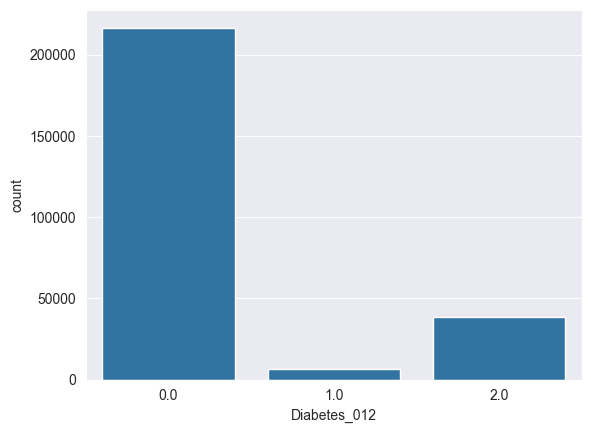

In [17]:
sns.countplot(x='Diabetes_012', data=df)

<Axes: >

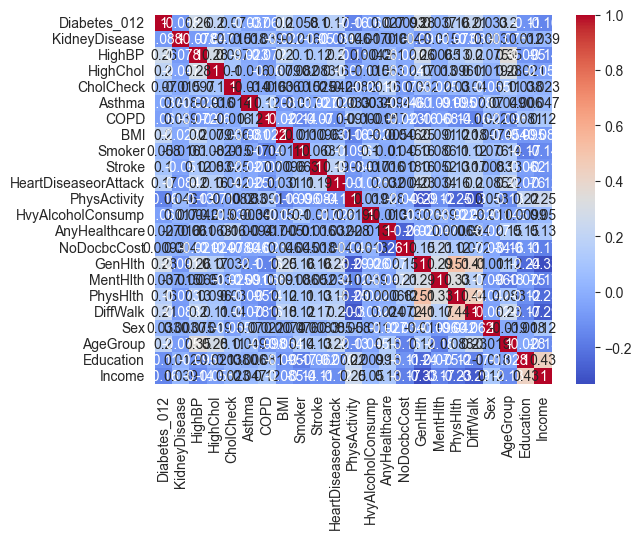

In [18]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')

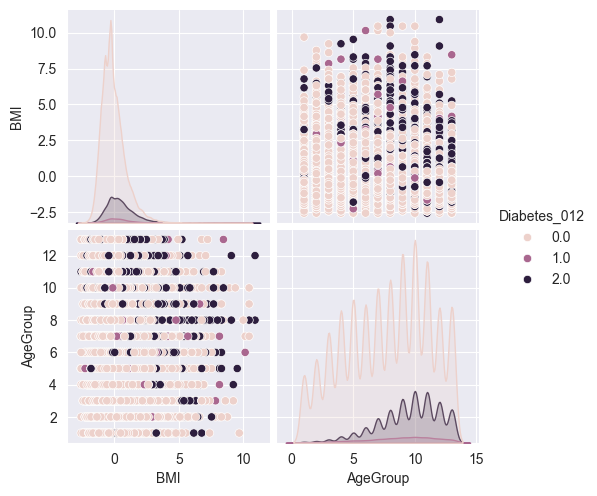

In [19]:
sns.pairplot(df[['BMI', 'AgeGroup', 'Diabetes_012']], hue='Diabetes_012')

In [5]:
# Initial Exploration
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nTarget Distribution:\n", df['Diabetes_012'].value_counts(normalize=True))

Shape: (261589, 23)

Columns: ['Diabetes_012', 'KidneyDisease', 'HighBP', 'HighChol', 'CholCheck', 'Asthma', 'COPD', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'AgeGroup', 'Education', 'Income']

Target Distribution:
 Diabetes_012
0.0    0.828636
2.0    0.146206
1.0    0.025158
Name: proportion, dtype: float64


In [6]:
# Preprocessing
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

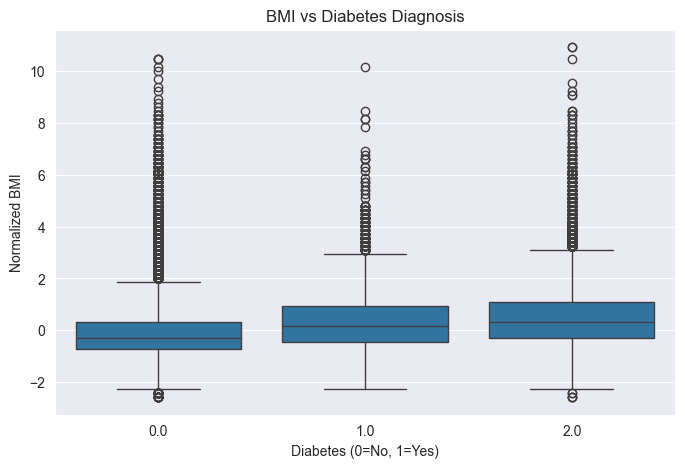

C:\Users\hasit\AppData\Local\Temp\ipykernel_26060\1917655614.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Diabetes_012', data=df, ci=None)


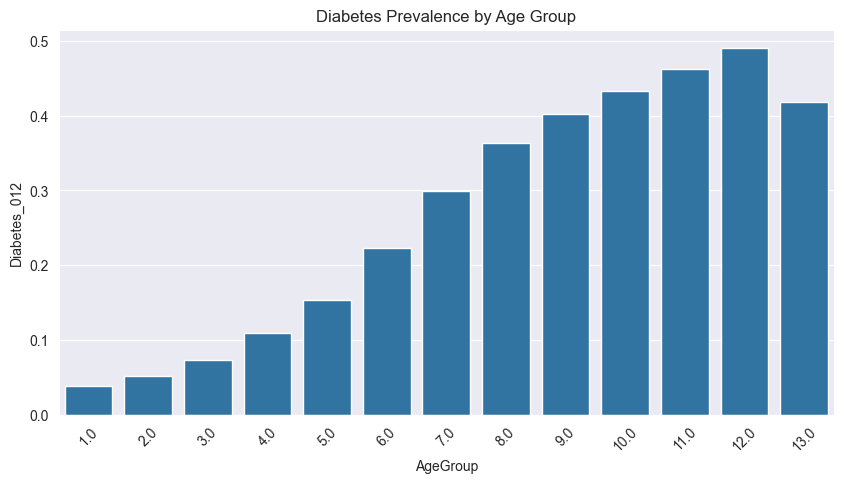

In [9]:
# Exploratory Data Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title("BMI vs Diabetes Diagnosis")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Normalized BMI")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Diabetes_012', data=df, ci=None)
plt.title("Diabetes Prevalence by Age Group")
plt.xticks(rotation=45)
plt.show()

In [11]:
# A/B Test Simulation: Impact of Cholesterol Check
group_A = df[df['CholCheck'] == 0]['Diabetes_012']
group_B = df[df['CholCheck'] == 1]['Diabetes_012']
t_stat, p_val = ttest_ind(group_A, group_B)
print(f"\nT-test (Cholesterol Check vs Diabetes): t = {t_stat:.4f}, p = {p_val:.4f}")
print(f"Mean Diabetes Rate - No Check: {group_A.mean():.4f}")
print(f"Mean Diabetes Rate - Chol Check: {group_B.mean():.4f}")


T-test (Cholesterol Check vs Diabetes): t = -36.0550, p = 0.0000
Mean Diabetes Rate - No Check: 0.0514
Mean Diabetes Rate - Chol Check: 0.3270


In [13]:
# Split features and target
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC for multiclass
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91     65211
         1.0       0.06      0.00      0.01      1940
         2.0       0.48      0.21      0.29     11326

    accuracy                           0.83     78477
   macro avg       0.47      0.39      0.40     78477
weighted avg       0.78      0.83      0.79     78477

ROC-AUC Score: 0.7273555520499784


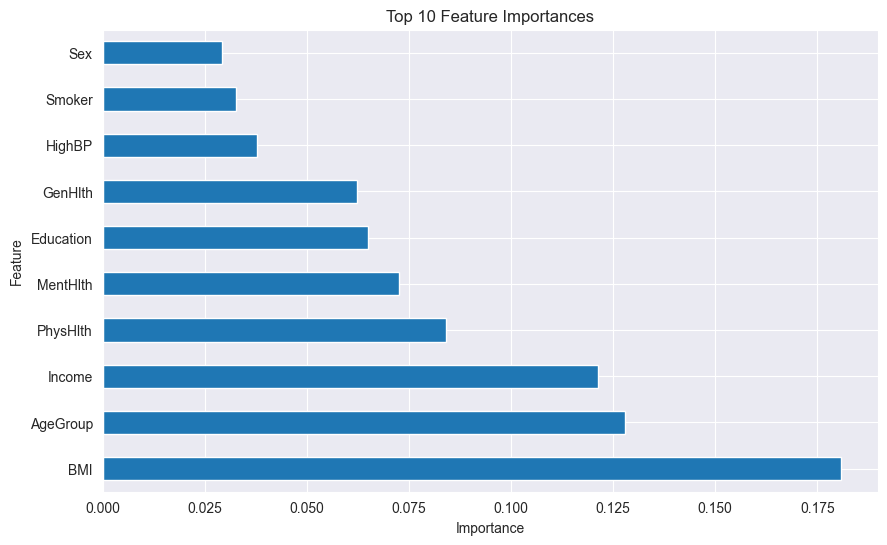

In [14]:
# Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()